In [1]:
# Load dependencies/packages
import numpy as np # for array operations
import pandas as pd # for neat tables, database-like grouping/summary tables & csv_read
import matplotlib.pyplot as plt # for the occasional plot
import seaborn as sns # for the occasional plot
sns.set_theme(style="whitegrid")

In [2]:
# Method to append to dict
def add_to_dict(dict_, key, value):
    if key not in dict_:
        dict_[key] = []
    dict_[key].append(value)
    
# alternatively, I could have used *from collections import defaultdict*

In [3]:
# Load Data
base_data = pd.read_csv('data/train_ver2.csv', parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t']) # load data

C:\Users\bradl\AppData\Local\Temp\ipykernel_20128\2633173038.py:2: DtypeWarning: Columns (5,8,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  base_data = pd.read_csv('data/train_ver2.csv', parse_dates=['fecha_dato', 'fecha_alta', 'ult_fec_cli_1t']) # load data


In [4]:
# Data Exploration of original dataset
base_data

,fecha_dato,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,ind_nuevo,antiguedad,indrel,...,ind_hip_fin_ult1,ind_plan_fin_ult1,ind_pres_fin_ult1,ind_reca_fin_ult1,ind_tjcr_fin_ult1,ind_valo_fin_ult1,ind_viv_fin_ult1,ind_nomina_ult1,ind_nom_pens_ult1,ind_recibo_ult1
0,2015-01-28,1375586,N,ES,H,35,2015-01-12,0.0,6,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
1,2015-01-28,1050611,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
2,2015-01-28,1050612,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
3,2015-01-28,1050613,N,ES,H,22,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
4,2015-01-28,1050614,N,ES,V,23,2012-08-10,0.0,35,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13647304,2016-05-28,1166765,N,ES,V,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647305,2016-05-28,1166764,N,ES,V,23,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647306,2016-05-28,1166763,N,ES,H,47,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0
13647307,2016-05-28,1166789,N,ES,H,22,2013-08-14,0.0,33,1.0,...,0,0,0,0,0,0,0,0.0,0.0,0


In [5]:
#*All percentages are by occurrence in the entire dataset* 
#Before: ‘ahor’ Savings Account – 0.0102%, ‘tjcr’ Credit Card – 4.4389%, ‘hip’ Mortgage – 0.5887% , 
#Current: ‘cco’ Current Account – 65.5484%, ‘ctop’ Particular Account – 12.9008%, ‘recibo’ Direct Debit – 12.7916%. 
base_data['ind_recibo_ult1'].sum()/base_data['ind_recibo_ult1'].count()

0.127916206777468

In [6]:
len(base_data['ncodpers'].unique())

956645

In [7]:
list(base_data.columns)

['fecha_dato',
 'ncodpers',
 'ind_empleado',
 'pais_residencia',
 'sexo',
 'age',
 'fecha_alta',
 'ind_nuevo',
 'antiguedad',
 'indrel',
 'ult_fec_cli_1t',
 'indrel_1mes',
 'tiprel_1mes',
 'indresi',
 'indext',
 'conyuemp',
 'canal_entrada',
 'indfall',
 'tipodom',
 'cod_prov',
 'nomprov',
 'ind_actividad_cliente',
 'renta',
 'segmento',
 'ind_ahor_fin_ult1',
 'ind_aval_fin_ult1',
 'ind_cco_fin_ult1',
 'ind_cder_fin_ult1',
 'ind_cno_fin_ult1',
 'ind_ctju_fin_ult1',
 'ind_ctma_fin_ult1',
 'ind_ctop_fin_ult1',
 'ind_ctpp_fin_ult1',
 'ind_deco_fin_ult1',
 'ind_deme_fin_ult1',
 'ind_dela_fin_ult1',
 'ind_ecue_fin_ult1',
 'ind_fond_fin_ult1',
 'ind_hip_fin_ult1',
 'ind_plan_fin_ult1',
 'ind_pres_fin_ult1',
 'ind_reca_fin_ult1',
 'ind_tjcr_fin_ult1',
 'ind_valo_fin_ult1',
 'ind_viv_fin_ult1',
 'ind_nomina_ult1',
 'ind_nom_pens_ult1',
 'ind_recibo_ult1']

In [8]:
barc_data = base_data[base_data['nomprov'] == 'BARCELONA']
barc_data = barc_data[barc_data['indfall'] != 'S']

In [9]:
#barc_data

In [10]:
# drop unrequired predictor and response vars
barc_data = barc_data.drop(columns=['pais_residencia', 'fecha_alta', 'ult_fec_cli_1t', 'tiprel_1mes', # predictors
                                    'canal_entrada', 'indfall', 'cod_prov', 'nomprov',
                                    'ind_aval_fin_ult1', 'ind_cder_fin_ult1', # responses
                                    'ind_cno_fin_ult1', 'ind_ctju_fin_ult1', 'ind_ctma_fin_ult1',
                                    'ind_ctpp_fin_ult1', 'ind_deco_fin_ult1',
                                    'ind_deme_fin_ult1', 'ind_dela_fin_ult1', 'ind_ecue_fin_ult1',
                                    'ind_fond_fin_ult1', 'ind_plan_fin_ult1', 'ind_reca_fin_ult1',
                                    'ind_valo_fin_ult1', 'ind_viv_fin_ult1', 'ind_nomina_ult1',
                                    'ind_nom_pens_ult1', 
                                    'ind_ahor_fin_ult1', 'ind_hip_fin_ult1', 'ind_pres_fin_ult1', 'ind_tjcr_fin_ult1'])

In [11]:
# Cleaning variable formats
# Clean 'age'
barc_data['age'] = barc_data['age'].astype(str).str.replace(' ', '') # cast all to str to remove leading spaces
barc_data['age'] = barc_data['age'].astype(np.int64) # cast back to int

# 'ind_nuevo' - fine
barc_data['ind_nuevo'] = barc_data['ind_nuevo'].astype(bool)

# Clean 'antiguedad'
# no nan's
# has NA, -999999 and leading spaces before strings in many cases
barc_data['antiguedad'] = barc_data['antiguedad'].astype(str).str.replace(' ', '') 
# cast all to str to remove leading spaces
barc_data['antiguedad'].mask(barc_data['antiguedad'] == 'NA', 0, inplace=True)
barc_data['antiguedad'].mask(barc_data['antiguedad'] == '-999999', 0, inplace=True)
barc_data['antiguedad'] = barc_data['antiguedad'].astype(np.int64) # cast to int

# Clean 'indrel_1mes'
barc_data['indrel_1mes'].mask(barc_data['indrel_1mes'] == 'P', 5, inplace=True)
barc_data['indrel_1mes'] = barc_data['indrel_1mes'].astype(float)

# Clean 'indresi' - residence index
barc_data['indresi'].mask(barc_data['indresi'] == 'S', 1, inplace=True)
barc_data['indresi'].mask(barc_data['indresi'] == 'N', 0, inplace=True)
barc_data['indresi'] = barc_data['indresi'].astype(bool) # cast to bool

# Clean 'indext' - foreigner index
barc_data['indext'].mask(barc_data['indext'] == 'S', 1, inplace=True)
barc_data['indext'].mask(barc_data['indext'] == 'N', 0, inplace=True)
barc_data['indext'] = barc_data['indext'].astype(bool) # cast to bool

# Clean 'conyuemp' - spouse of employee
# base_data['conyuemp'].isnull().sum() # 4392109
barc_data['conyuemp'].mask(barc_data['conyuemp'] == 'S', 1, inplace=True)
barc_data['conyuemp'].mask(barc_data['conyuemp'] == 'N', 0, inplace=True)
barc_data['conyuemp'].mask(barc_data['conyuemp'].isnull(), 0, inplace=True) 
# if it is unknown it is safe to assume person is not spouse of employee
barc_data['conyuemp'] = barc_data['conyuemp'].astype(bool) # cast to bool

# 'tipodom' - fine
barc_data['tipodom'] = barc_data['tipodom'].astype(bool)

# 'ind_actividad_cliente' - fine
barc_data['ind_actividad_cliente'] = barc_data['ind_actividad_cliente'].astype(bool)

# Clean 'segmento' - customer background
barc_data['segmento'].mask(barc_data['segmento'] == '03 - UNIVERSITARIO', 'uni grad', inplace=True)
barc_data['segmento'].mask(barc_data['segmento'] == '02 - PARTICULARES', 'regular', inplace=True)
barc_data['segmento'].mask(barc_data['segmento'] == '01 - TOP', 'vip', inplace=True)

C:\Users\bradl\AppData\Local\Temp\ipykernel_20128\376115610.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


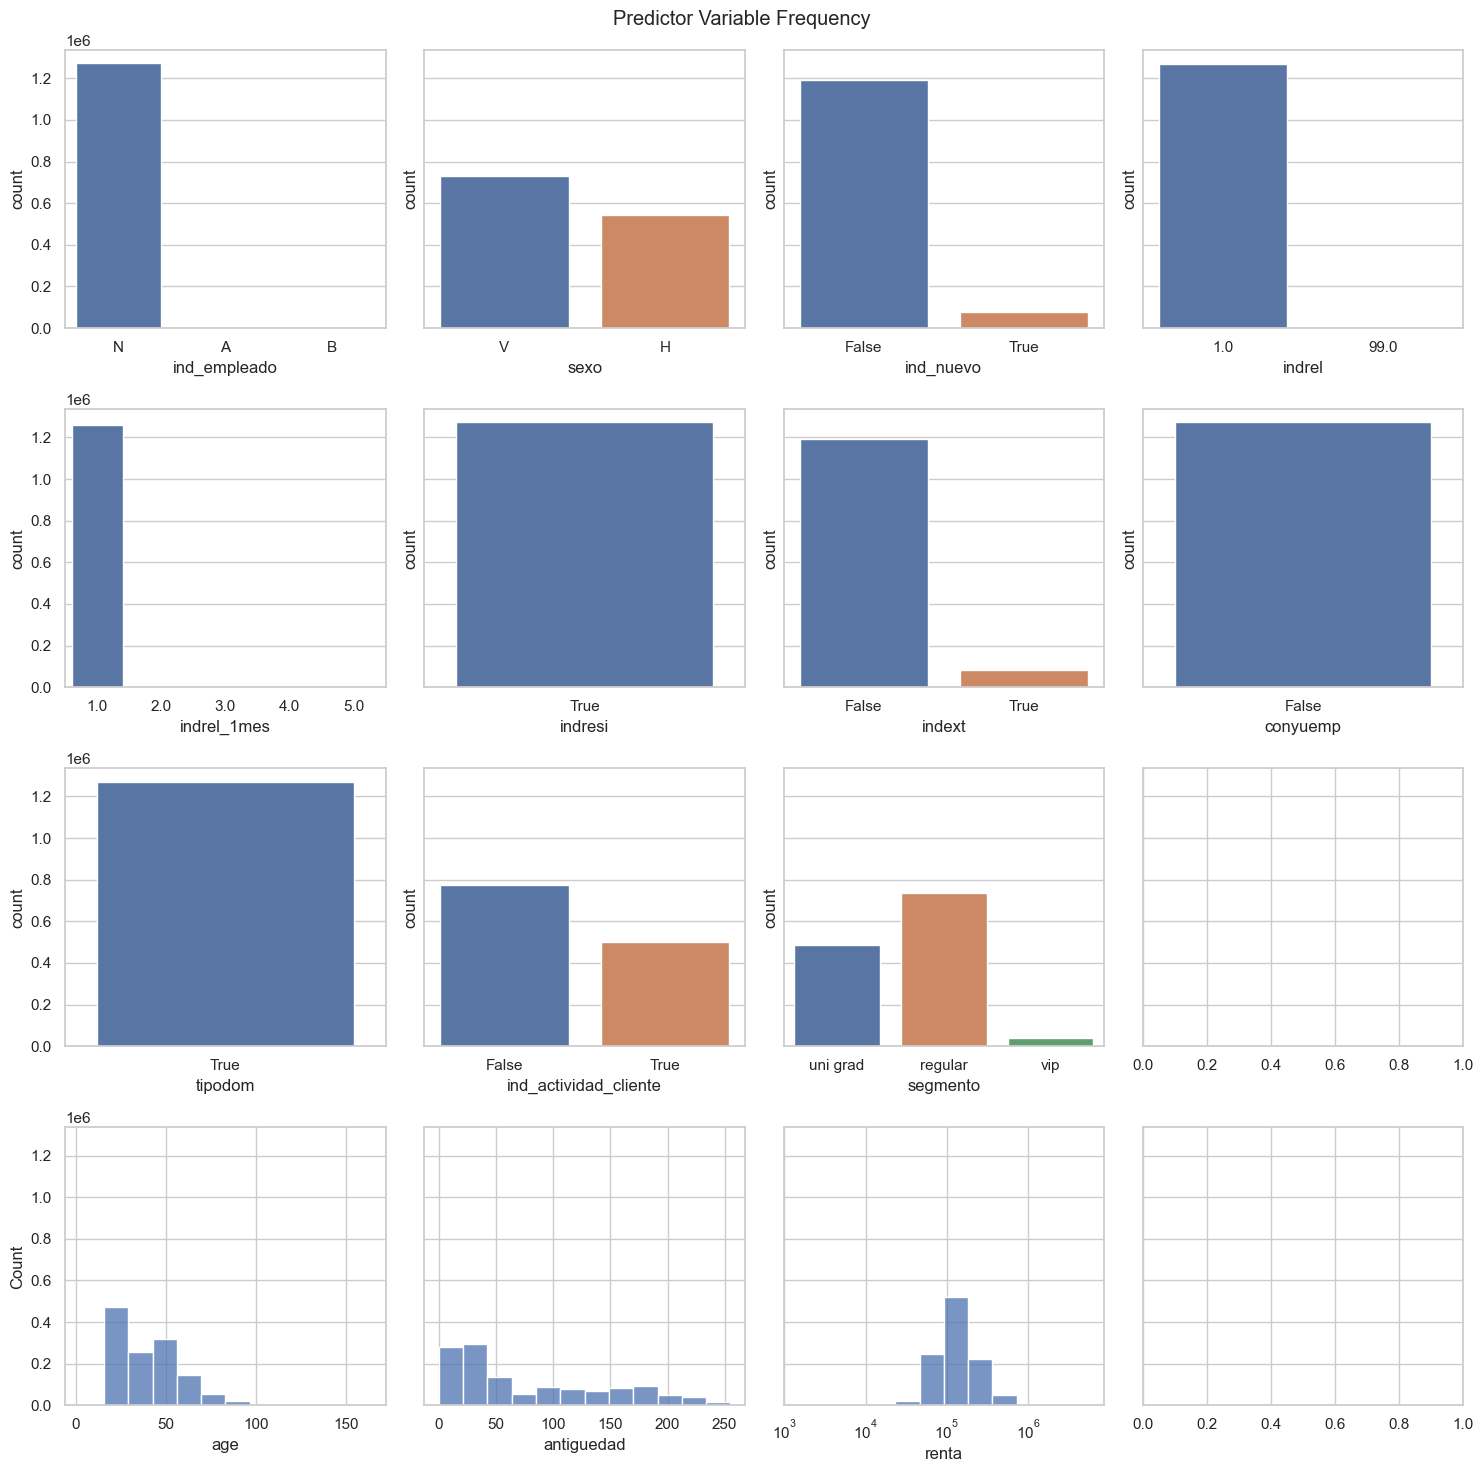

In [12]:
# frequency of variable occurrence
count_fig_var_list = ['ind_empleado', 'sexo', 'ind_nuevo', 'indrel', 'indrel_1mes','indresi',
                      'indext', 'conyuemp','tipodom', 'ind_actividad_cliente', 'segmento'] # binary or categorical pred vars

histogram_fig_var_list = ['age', 'antiguedad'] # int or float pred vars with large ranges
# 'renta' to be dealt with separately

row_num = 4
col_num = 4
fig, ax = plt.subplots(row_num, col_num, figsize=(15, 15), sharey=True)
fig.suptitle('Predictor Variable Frequency')

for i, var in enumerate(count_fig_var_list):
    sns.countplot(x=barc_data[var], ax=ax[np.floor(i/col_num).astype(int), i%col_num])

i_last = i + 2 # continue indexing on next row

for i, var in enumerate(histogram_fig_var_list):
    i = i_last + i
    sns.histplot(x=barc_data[var], bins=12, ax=ax[np.floor(i/col_num).astype(int), i%col_num])
    
i_last = i + 1
i = i_last + 0 
sns.histplot(x=barc_data['renta'], bins=12, log_scale=True, ax=ax[np.floor(i/col_num).astype(int), i%col_num])

fig.tight_layout(pad=1.08)
fig.show()

In [13]:
# Remove 'ind_empleado', 'indrel', 'indrel_1mes', 'indresi', 'conyuemp' and  'tipodom' ...
# ... as they offer no variability in describing the bank customers
barc_data = barc_data.drop(columns=['ind_empleado', 'indrel', 'indrel_1mes', 'indresi', 'conyuemp', 'tipodom'])

In [14]:
barc_data.dtypes

fecha_dato               datetime64[ns]
ncodpers                          int64
sexo                             object
age                               int64
ind_nuevo                          bool
antiguedad                        int64
indext                             bool
ind_actividad_cliente              bool
renta                           float64
segmento                         object
ind_cco_fin_ult1                  int64
ind_ctop_fin_ult1                 int64
ind_recibo_ult1                   int64
dtype: object

In [15]:
### Dummy Variables ###
# !~ be careful of index insertion of dummy variables #

# Dummy Vars for 'ind_impleado' - IGNORE for barcelona data
#for category in ['S', 'N', 'F', 'B', 'A']:
    #barc_data.insert(3, 'ind_impleado_dummy_var_{}'.format(category), barc_data['ind_empleado'] == category)
#barc_data = barc_data.drop(columns=['ind_empleado'])

# Dummy Vars for 'sexo'
barc_data.insert(2, 'sexo_dummy_var_nan', barc_data['sexo'].isnull())
barc_data.insert(2, 'sexo_dummy_var_female', barc_data['sexo'] == 'V')
barc_data.insert(2, 'sexo_dummy_var_male', barc_data['sexo'] == 'H')
barc_data = barc_data.drop(columns=['sexo'])

# Clean 'indrel' - IGNORE for barcelona data
#barc_data['indrel'].mask(barc_data['indrel'] == 99, 0, inplace=True)
#barc_data['indrel'] = barc_data['indrel'].astype(bool)

# Dummy vars 'indrel_1mes' - IGNORE for barcelona data
#barc_data['indrel_1mes'].unique()
#barc_data.insert(14, 'indrel_1mes_dummy_var_nan', barc_data['indrel_1mes'].isnull())
#barc_data.insert(14, 'indrel_1mes_dummy_var_P', barc_data['indrel_1mes'] == 5.)
#for category in [4, 3, 2, 1]:
    #barc_data.insert(14, 'indrel_1mes_dummy_var_{}'.format(category), barc_data['indrel_1mes'] == category)
#barc_data = barc_data.drop(columns=['indrel_1mes'])

# Dummy Vars 'renta'
barc_data.insert(11, 'renta_dummy_var_nan', barc_data['renta'].isnull())
barc_data['renta'].mask(barc_data['renta'].isnull(), 0, inplace=True) 

# Dummy Vars 'segmento '
barc_data.insert(12, 'segmento_dummy_var_nan', barc_data['segmento'].isnull())
barc_data.insert(12, 'segmento_dummy_var_03', barc_data['segmento'] == 'uni grad')
barc_data.insert(12, 'segmento_dummy_var_02', barc_data['segmento'] == 'regular')
barc_data.insert(12, 'segmento_dummy_var_01', barc_data['segmento'] == 'vip')
barc_data = barc_data.drop(columns=['segmento'])

In [16]:
# response as bool
barc_data['ind_cco_fin_ult1'] = barc_data['ind_cco_fin_ult1'].astype(bool)
barc_data['ind_ctop_fin_ult1'] = barc_data['ind_ctop_fin_ult1'].astype(bool)
barc_data['ind_recibo_ult1'] = barc_data['ind_recibo_ult1'].astype(bool)

In [17]:
# check column names, datatypes and format
barc_data.dtypes
#barc_data

fecha_dato                datetime64[ns]
ncodpers                           int64
sexo_dummy_var_male                 bool
sexo_dummy_var_female               bool
sexo_dummy_var_nan                  bool
age                                int64
ind_nuevo                           bool
antiguedad                         int64
indext                              bool
ind_actividad_cliente               bool
renta                            float64
renta_dummy_var_nan                 bool
segmento_dummy_var_01               bool
segmento_dummy_var_02               bool
segmento_dummy_var_03               bool
segmento_dummy_var_nan              bool
ind_cco_fin_ult1                    bool
ind_ctop_fin_ult1                   bool
ind_recibo_ult1                     bool
dtype: object

In [18]:
barc_data.isnull().sum() # count nan's

fecha_dato                0
ncodpers                  0
sexo_dummy_var_male       0
sexo_dummy_var_female     0
sexo_dummy_var_nan        0
age                       0
ind_nuevo                 0
antiguedad                0
indext                    0
ind_actividad_cliente     0
renta                     0
renta_dummy_var_nan       0
segmento_dummy_var_01     0
segmento_dummy_var_02     0
segmento_dummy_var_03     0
segmento_dummy_var_nan    0
ind_cco_fin_ult1          0
ind_ctop_fin_ult1         0
ind_recibo_ult1           0
dtype: int64

In [19]:
barc_data['ind_cco_fin_ult1'].sum()/len(barc_data['ind_cco_fin_ult1'])

0.6099462874998722

In [20]:
barc_data_corr = barc_data.corr()

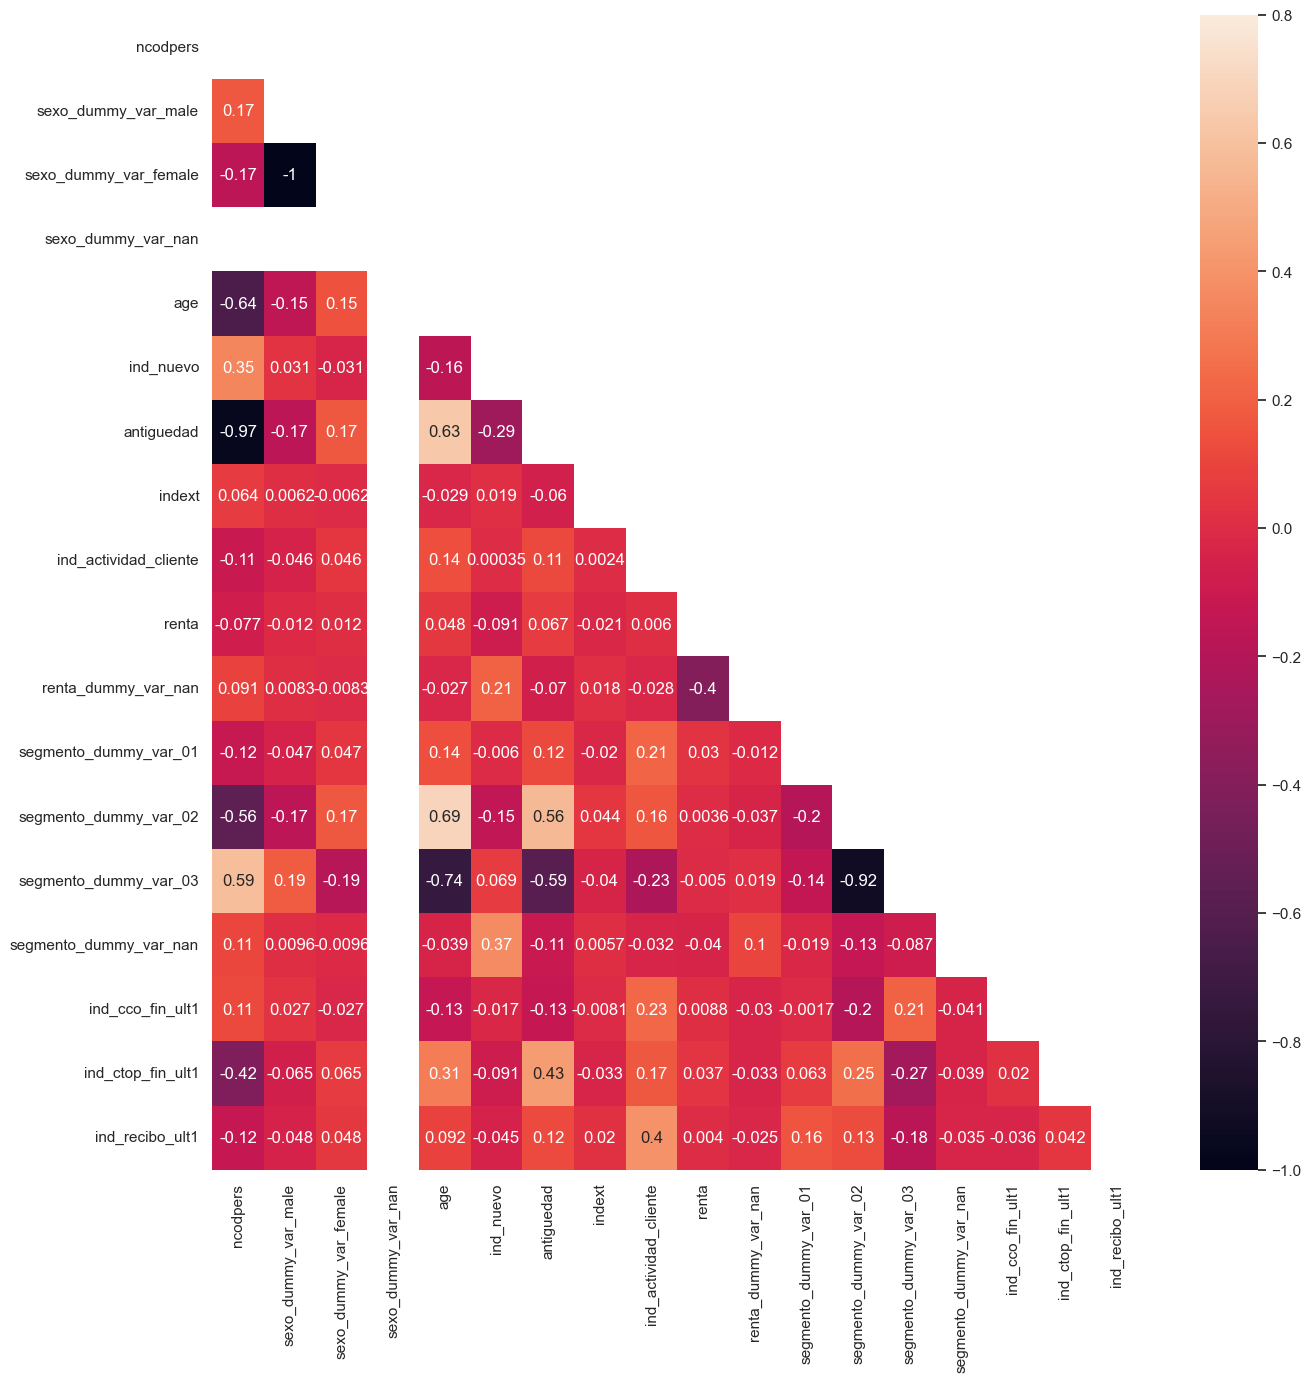

In [21]:
mask = np.triu(np.ones_like(barc_data_corr)) # add a mask
plt.subplots(figsize=(15, 15))
sns.heatmap(barc_data_corr, vmax=0.8, annot=True, mask=mask)
plt.show()  

In [22]:
# base_data is original dataset
# barc_data is final cleaned barcelona data
model_data = barc_data # save a copy of dataframe to manipulate for modeling

In [23]:
#output data
#compression_opts = dict(method='zip',
#                        archive_name='out.csv')
#barc_data.to_csv('out.zip', index=False,
#          compression=compression_opts)

In [24]:
### Model design decision for addressing time-series data ###
# use last/current month '2016-05-28' for response variables #
# use previous 6 month averages for predictor variables '2015-11-28 to 2016-04-28' #
# this allows the usage of models covered in the course #

In [25]:
# predictor variables dataframe
model_data_pred = model_data[model_data['fecha_dato'] > '2015-10-28']
model_data_pred = model_data_pred[model_data_pred['fecha_dato'] < '2016-05-28']

In [26]:
model_data_pred['fecha_dato'].unique() # check date bounds are correct - should be 6 months of data prior to 2016-05-28

array(['2015-11-28T00:00:00.000000000', '2015-12-28T00:00:00.000000000',
       '2016-01-28T00:00:00.000000000', '2016-02-28T00:00:00.000000000',
       '2016-03-28T00:00:00.000000000', '2016-04-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [27]:
# response variable dataframe
model_data_res = model_data.loc[model_data['fecha_dato'] == '2016-05-28']

In [28]:
### Prepare predictor dataframe for merging ###
# delete response vars from predictor var df
model_data_pred = model_data_pred.drop(columns=['ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_recibo_ult1'])  
model_data_pred = model_data_pred.groupby('ncodpers').mean() # group by unique customer IDs

In [29]:
model_data_pred.isnull().values.any() # False

False

In [30]:
# re-add ncodpers (customer IDs) to merge predictor dataframe and response dataframe by
model_data_pred['ncodpers']=model_data_pred.index 
model_data_pred.index.name = None # delete index_name

In [31]:
model_data_pred

,sexo_dummy_var_male,sexo_dummy_var_female,sexo_dummy_var_nan,age,ind_nuevo,antiguedad,indext,ind_actividad_cliente,renta,renta_dummy_var_nan,segmento_dummy_var_01,segmento_dummy_var_02,segmento_dummy_var_03,segmento_dummy_var_nan,ncodpers
16162,0.0,1.0,0.0,57.500000,0.0,251.500000,0.0,1.0,215210.22,0.0,0.0,1.0,0.0,0.0,16162
16163,1.0,0.0,0.0,47.500000,0.0,251.500000,0.0,1.0,150173.73,0.0,0.0,1.0,0.0,0.0,16163
16174,0.0,1.0,0.0,69.166667,0.0,251.500000,0.0,0.0,576561.87,0.0,0.0,1.0,0.0,0.0,16174
16187,1.0,0.0,0.0,68.000000,0.0,251.500000,0.0,1.0,195763.32,0.0,1.0,0.0,0.0,0.0,16187
16202,1.0,0.0,0.0,67.000000,0.0,251.166667,0.0,1.0,533919.99,0.0,0.0,1.0,0.0,0.0,16202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548163,0.0,1.0,0.0,28.000000,1.0,0.000000,1.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1548163
1548168,0.0,1.0,0.0,51.000000,1.0,0.000000,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1548168
1548175,1.0,0.0,0.0,44.000000,1.0,0.000000,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1548175
1548204,0.0,1.0,0.0,54.000000,1.0,0.000000,0.0,0.0,0.00,1.0,0.0,0.0,0.0,1.0,1548204


In [32]:
### Prepare response dataframe for merging ###

In [33]:
# delete predictor vars from response var df
model_data_res = model_data_res[['ncodpers', 'ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_recibo_ult1']]   

In [34]:
model_data_res

,ncodpers,ind_cco_fin_ult1,ind_ctop_fin_ult1,ind_recibo_ult1
12715860,657794,True,False,False
12715868,657779,False,False,False
12715869,657799,False,False,False
12715888,657758,False,False,False
12715899,657817,False,False,False
...,...,...,...,...
13647267,1166743,False,False,False
13647270,1166740,False,False,False
13647273,1166737,False,False,False
13647274,1166736,False,False,False


In [35]:
### Merge predictor and response dataframe ###

In [36]:
model_data_merged = pd.merge(model_data_pred, model_data_res, on='ncodpers')
model_data_merged = model_data_merged.drop(columns='ncodpers') # delete 'ncodpers' customer IDs

In [37]:
model_data_merged.dtypes

sexo_dummy_var_male       float64
sexo_dummy_var_female     float64
sexo_dummy_var_nan        float64
age                       float64
ind_nuevo                 float64
antiguedad                float64
indext                    float64
ind_actividad_cliente     float64
renta                     float64
renta_dummy_var_nan       float64
segmento_dummy_var_01     float64
segmento_dummy_var_02     float64
segmento_dummy_var_03     float64
segmento_dummy_var_nan    float64
ind_cco_fin_ult1             bool
ind_ctop_fin_ult1            bool
ind_recibo_ult1              bool
dtype: object

In [38]:
### Fix binary variables that have been rounded to 0 < x < 1 ###
# cast all binary values back to boolean
var_list = ['sexo_dummy_var_male', 'sexo_dummy_var_female', 'sexo_dummy_var_nan', 'ind_nuevo',
           'indext', 'ind_actividad_cliente', 'renta_dummy_var_nan', 'segmento_dummy_var_01',
           'segmento_dummy_var_02', 'segmento_dummy_var_03', 'segmento_dummy_var_nan']
for var in var_list:
    model_data_merged[var] = model_data_merged[var].astype(bool) 

In [39]:
#model_data_merged

In [40]:
# cast binary values into int32 for ease of use
var_list = ['sexo_dummy_var_male', 'sexo_dummy_var_female', 'sexo_dummy_var_nan', 'ind_nuevo',
           'indext', 'ind_actividad_cliente', 'renta_dummy_var_nan', 'segmento_dummy_var_01',
           'segmento_dummy_var_02', 'segmento_dummy_var_03', 'segmento_dummy_var_nan',
            'ind_cco_fin_ult1', 'ind_ctop_fin_ult1', 'ind_recibo_ult1']
for var in var_list:
    model_data_merged[var] = model_data_merged[var].astype(int) 

In [41]:
model_data_merged

,sexo_dummy_var_male,sexo_dummy_var_female,sexo_dummy_var_nan,age,ind_nuevo,antiguedad,indext,ind_actividad_cliente,renta,renta_dummy_var_nan,segmento_dummy_var_01,segmento_dummy_var_02,segmento_dummy_var_03,segmento_dummy_var_nan,ind_cco_fin_ult1,ind_ctop_fin_ult1,ind_recibo_ult1
0,0,1,0,57.500000,0,251.500000,0,1,215210.22,0,0,1,0,0,1,0,0
1,1,0,0,47.500000,0,251.500000,0,1,150173.73,0,0,1,0,0,0,0,0
2,0,1,0,69.166667,0,251.500000,0,0,576561.87,0,0,1,0,0,0,0,0
3,1,0,0,68.000000,0,251.500000,0,1,195763.32,0,1,0,0,0,0,0,1
4,1,0,0,67.000000,0,251.166667,0,1,533919.99,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88025,0,1,0,28.000000,1,0.000000,1,0,0.00,1,0,0,0,1,0,0,0
88026,0,1,0,51.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0,0,0
88027,1,0,0,44.000000,1,0.000000,0,0,0.00,1,0,0,0,1,1,0,0
88028,0,1,0,54.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0,0,0


In [42]:
model_data_merged.dtypes
# it is okay that age and antiguedad have been converted from int to float-averages

sexo_dummy_var_male         int32
sexo_dummy_var_female       int32
sexo_dummy_var_nan          int32
age                       float64
ind_nuevo                   int32
antiguedad                float64
indext                      int32
ind_actividad_cliente       int32
renta                     float64
renta_dummy_var_nan         int32
segmento_dummy_var_01       int32
segmento_dummy_var_02       int32
segmento_dummy_var_03       int32
segmento_dummy_var_nan      int32
ind_cco_fin_ult1            int32
ind_ctop_fin_ult1           int32
ind_recibo_ult1             int32
dtype: object

In [43]:
model_data_cco = model_data_merged.drop(columns=['ind_ctop_fin_ult1', 'ind_recibo_ult1'])
model_data_ctop = model_data_merged.drop(columns=['ind_cco_fin_ult1', 'ind_recibo_ult1'])
model_data_recibo = model_data_merged.drop(columns=['ind_cco_fin_ult1', 'ind_ctop_fin_ult1'])

In [44]:
model_data_cco

,sexo_dummy_var_male,sexo_dummy_var_female,sexo_dummy_var_nan,age,ind_nuevo,antiguedad,indext,ind_actividad_cliente,renta,renta_dummy_var_nan,segmento_dummy_var_01,segmento_dummy_var_02,segmento_dummy_var_03,segmento_dummy_var_nan,ind_cco_fin_ult1
0,0,1,0,57.500000,0,251.500000,0,1,215210.22,0,0,1,0,0,1
1,1,0,0,47.500000,0,251.500000,0,1,150173.73,0,0,1,0,0,0
2,0,1,0,69.166667,0,251.500000,0,0,576561.87,0,0,1,0,0,0
3,1,0,0,68.000000,0,251.500000,0,1,195763.32,0,1,0,0,0,0
4,1,0,0,67.000000,0,251.166667,0,1,533919.99,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88025,0,1,0,28.000000,1,0.000000,1,0,0.00,1,0,0,0,1,0
88026,0,1,0,51.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0
88027,1,0,0,44.000000,1,0.000000,0,0,0.00,1,0,0,0,1,1
88028,0,1,0,54.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0


In [45]:
model_data_ctop

,sexo_dummy_var_male,sexo_dummy_var_female,sexo_dummy_var_nan,age,ind_nuevo,antiguedad,indext,ind_actividad_cliente,renta,renta_dummy_var_nan,segmento_dummy_var_01,segmento_dummy_var_02,segmento_dummy_var_03,segmento_dummy_var_nan,ind_ctop_fin_ult1
0,0,1,0,57.500000,0,251.500000,0,1,215210.22,0,0,1,0,0,0
1,1,0,0,47.500000,0,251.500000,0,1,150173.73,0,0,1,0,0,0
2,0,1,0,69.166667,0,251.500000,0,0,576561.87,0,0,1,0,0,0
3,1,0,0,68.000000,0,251.500000,0,1,195763.32,0,1,0,0,0,0
4,1,0,0,67.000000,0,251.166667,0,1,533919.99,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88025,0,1,0,28.000000,1,0.000000,1,0,0.00,1,0,0,0,1,0
88026,0,1,0,51.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0
88027,1,0,0,44.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0
88028,0,1,0,54.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0


In [46]:
model_data_recibo

,sexo_dummy_var_male,sexo_dummy_var_female,sexo_dummy_var_nan,age,ind_nuevo,antiguedad,indext,ind_actividad_cliente,renta,renta_dummy_var_nan,segmento_dummy_var_01,segmento_dummy_var_02,segmento_dummy_var_03,segmento_dummy_var_nan,ind_recibo_ult1
0,0,1,0,57.500000,0,251.500000,0,1,215210.22,0,0,1,0,0,0
1,1,0,0,47.500000,0,251.500000,0,1,150173.73,0,0,1,0,0,0
2,0,1,0,69.166667,0,251.500000,0,0,576561.87,0,0,1,0,0,0
3,1,0,0,68.000000,0,251.500000,0,1,195763.32,0,1,0,0,0,1
4,1,0,0,67.000000,0,251.166667,0,1,533919.99,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88025,0,1,0,28.000000,1,0.000000,1,0,0.00,1,0,0,0,1,0
88026,0,1,0,51.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0
88027,1,0,0,44.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0
88028,0,1,0,54.000000,1,0.000000,0,0,0.00,1,0,0,0,1,0


In [ ]:
#output data cco
compression_opts = dict(method='zip',
                        archive_name='out_barc_cco_6mth_ave.csv')
model_data_cco.to_csv('out_barc_cco_6mth_ave.zip', index=False,
          compression=compression_opts)

In [ ]:
#output data ctop
compression_opts = dict(method='zip',
                        archive_name='out_barc_ctop_6mth_ave.csv')
model_data_ctop.to_csv('out_barc_ctop_6mth_ave.zip', index=False,
          compression=compression_opts)

In [ ]:
#output data recibo
compression_opts = dict(method='zip',
                        archive_name='out_barc_recibo_6mth_ave.csv')
model_data_recibo.to_csv('out_barc_recibo_6mth_ave.zip', index=False,
          compression=compression_opts)